# Causal Inference Model

In [16]:
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
import pandas as pd
import numpy as np

In [4]:
import warnings
# silence warnings
warnings.filterwarnings("ignore")

# Structure from Domain Knowledge

In [6]:
# Creating an empty Structural Model
sm = StructureModel()

In [7]:
# Outlier Revalued, MinMaxed And Normalized Data
data = pd.read_csv('../data/norm_data.csv')

In [8]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.014571,0.008407,0.099459,0.810739,0.000096,0.000075,0.000050,0.000119,0.000196,0.000064,...,0.014036,0.149513,0.556016,0.000131,0.000172,0.000577,0.000215,0.000229,0.000096,1
1,0.013623,0.011769,0.088018,0.878194,0.000056,0.000052,0.000058,0.000046,0.000120,0.000038,...,0.015504,0.105171,0.454661,0.000082,0.000124,0.000160,0.000123,0.000182,0.000059,1
2,0.009375,0.010118,0.061900,0.572811,0.000052,0.000076,0.000094,0.000061,0.000099,0.000029,...,0.012156,0.072613,0.813743,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042,1
3,0.016325,0.029133,0.110899,0.551923,0.000137,0.000132,0.000345,0.000150,0.000256,0.000088,...,0.037881,0.141333,0.811516,0.000188,0.000303,0.000982,0.000368,0.000403,0.000114,1
4,0.009893,0.006992,0.065873,0.632398,0.000049,0.000065,0.000097,0.000051,0.000088,0.000029,...,0.008128,0.074210,0.767947,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037,1


In [9]:
sm.edges

OutEdgeView([])

In [11]:
# We can now apply the NOTEARS algorithm to learn the structure.

In [13]:
# visualise the learned StructureModel using the plot function.

In [20]:
sm_data = from_pandas(data.iloc[:, :], w_threshold=0.8, tabu_parent_nodes=['diagnosis'])

In [21]:
# Plotting the Structure Model
node_attributes = {
    "diagnosis": { 
        "shape": "star",
        "style": "filled",
        "width": 0.6,
        "penwidth": "1", 
        "color": "#4a90e2d9",
        "orientation": 25, 
    },
    "fontsize": 0.1
}

graph_attributes = {
    "scale": "1",
    "size": 5,
    "label": "Breast Cancer Causality model",
    "fontcolor": "#FFFFFFD9",
    "fontname": "Helvetica",
    "fontsize": 25, # font size of the graph title
    "dpi": 200,  # resolution
    "labeljust": "l",  # left
    "labelloc": "t",  # top
}

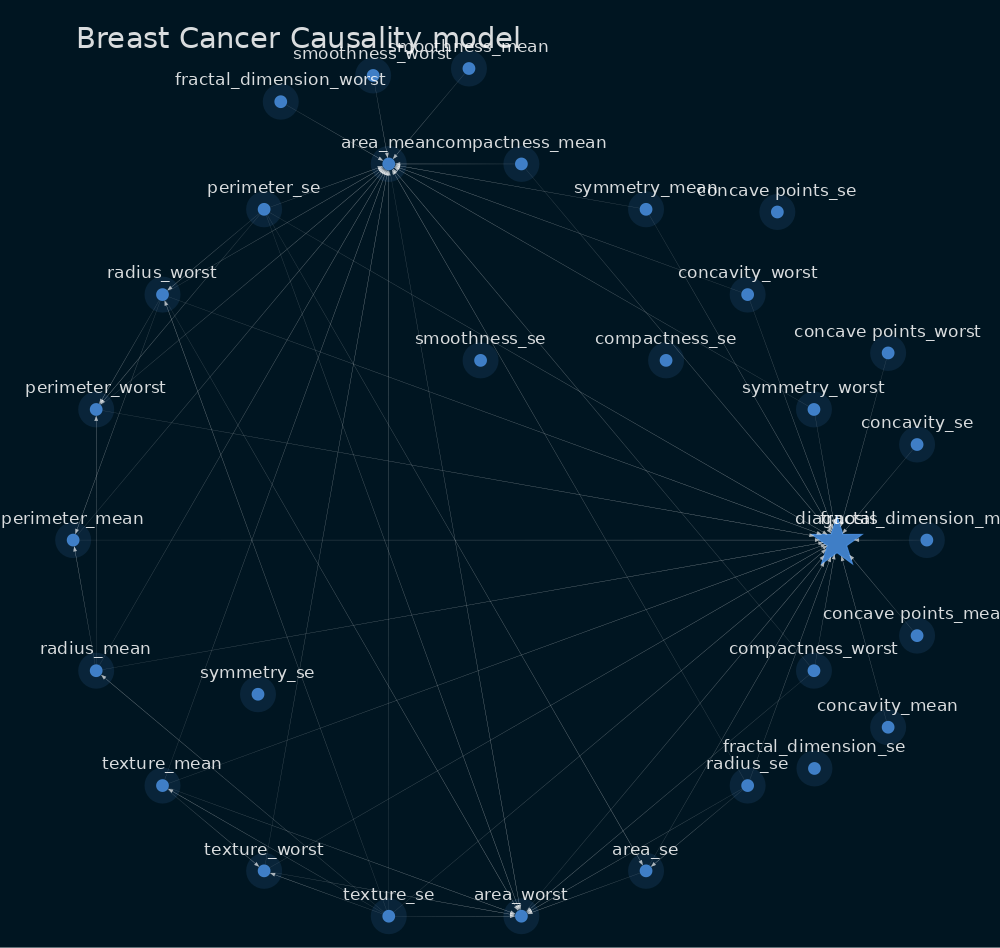

In [24]:
# Plotting the Structure Model
# sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm_data,
    prog="circo",
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    all_edge_attributes=EDGE_STYLE.WEAK)
    
Image(viz.draw(format='png'))

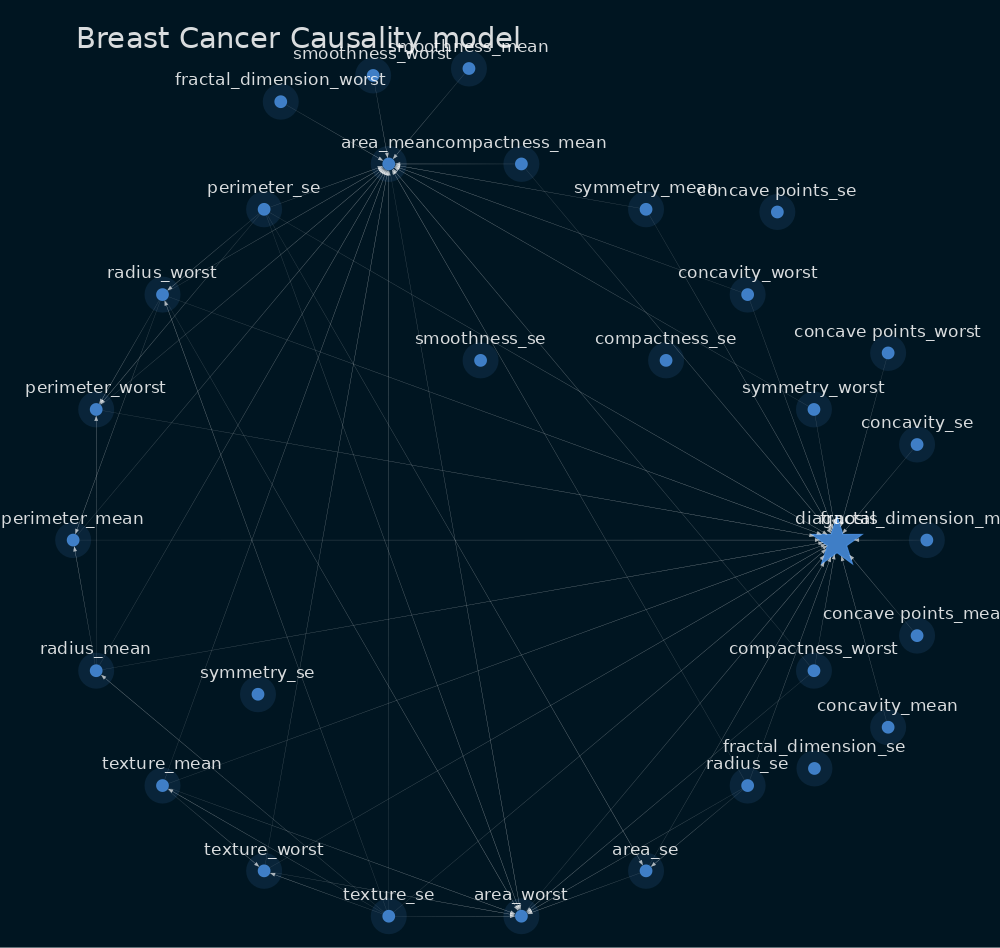

In [25]:
sm.remove_edges_below_threshold(0.8)
# Plotting the Structure Model
# sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm_data,
    prog="circo",
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    all_edge_attributes=EDGE_STYLE.WEAK)
    
Image(viz.draw(format='png'))

In [26]:
# retrieve the largest subgraph easily by calling the StructureModel function get_largest_subgraph().

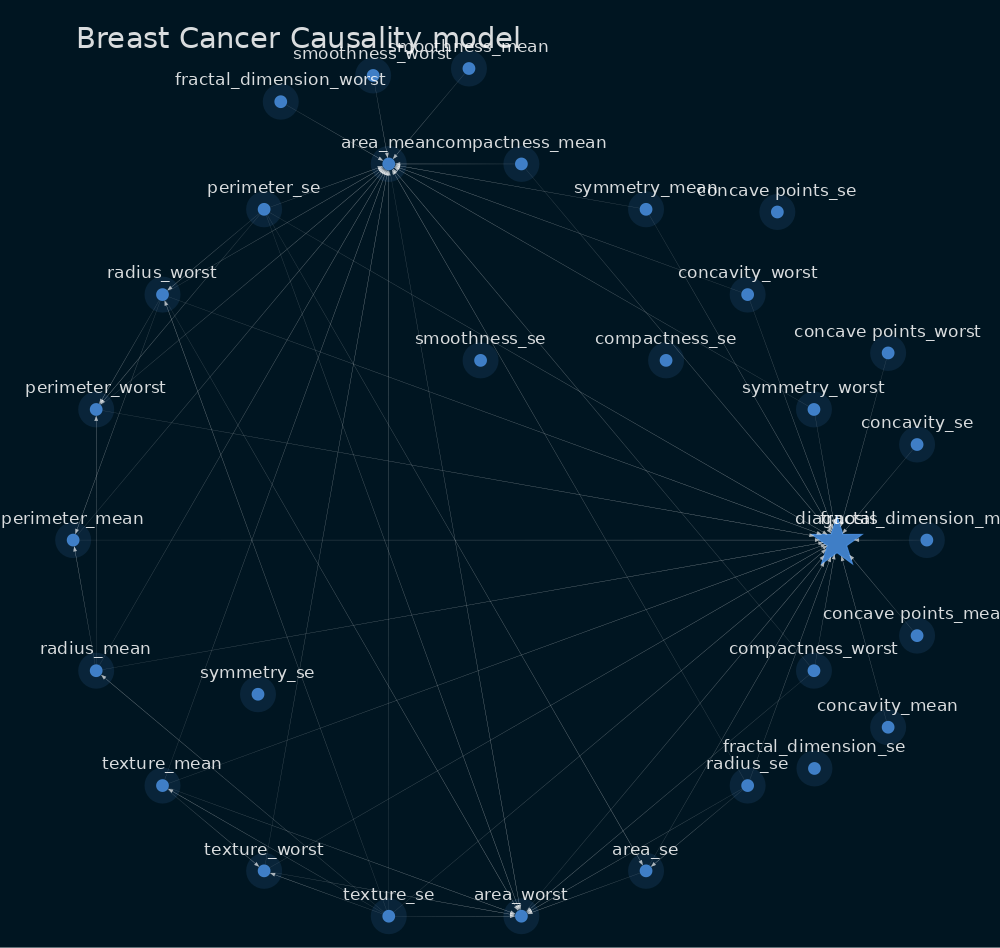

In [29]:
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm_data,
    prog="circo",
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

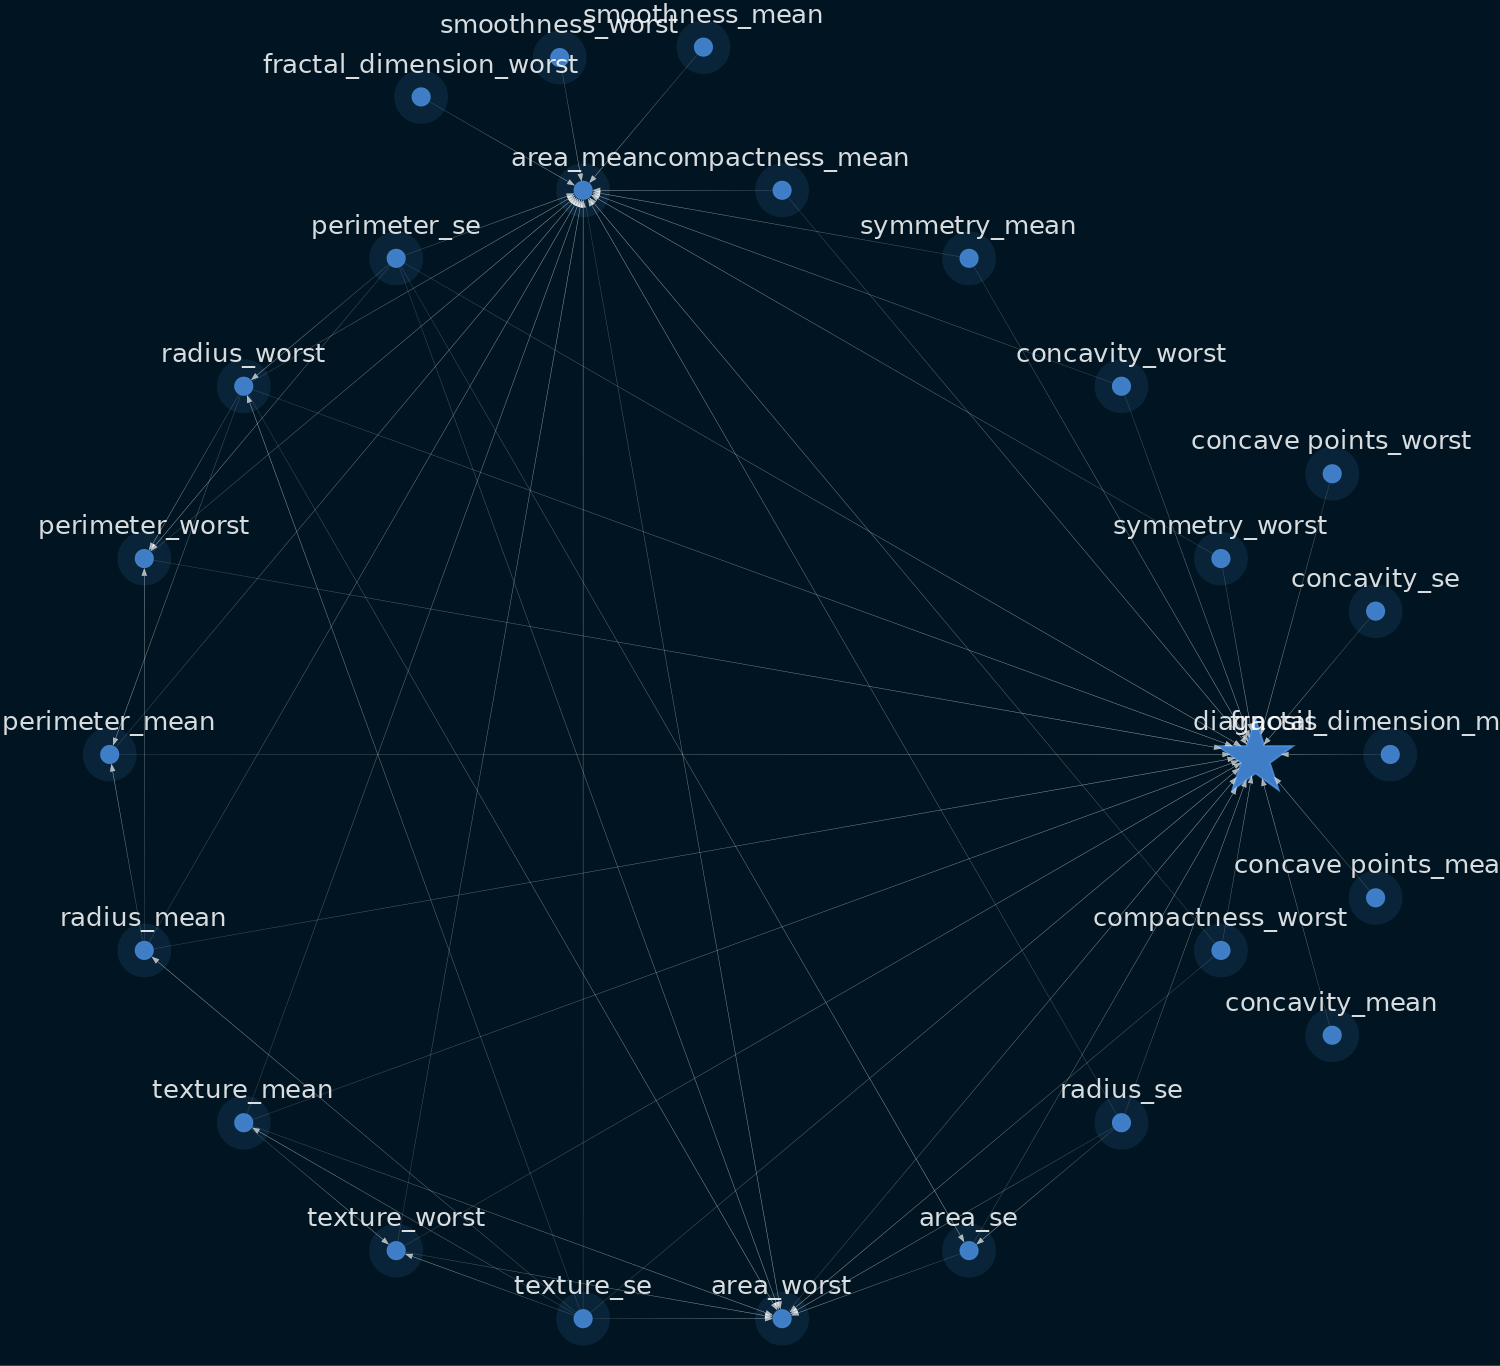

In [36]:
target = sm_data.get_target_subgraph('diagnosis')
viz = plot_structure(
    target,
    prog="circo",
    graph_attributes={"scale": "1", "size": 5},
    node_attributes=node_attributes,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [30]:
# Exporting the Structure

In [35]:
# import networkx as nx

# nx.drawing.nx_pydot.write_dot(sm_data, 'graph.dot')

In [37]:
edges = list(target.edges())
feature_extraction = []
for start,end in edges:
    if(end == 'diagnosis'):
        feature_extraction.append(start)
feature_extraction

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'concavity_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

In [38]:
# jaccard similarity (stability)

In [42]:
# Half of the Data

In [39]:
data_sec = data.iloc[:, :]

In [40]:
portion = int(data_sec.shape[0] *.5)
data_por = data_sec.head(portion)

In [41]:
sm1 = from_pandas(data_por, tabu_parent_nodes=['diagnosis'])
sm1.remove_edges_below_threshold(0.8)
sm1 = sm1.get_largest_subgraph()

In [43]:
# Using Full Data

In [44]:
portion = int(data_sec.shape[0]*1)
data_por = data_sec.head(portion)

In [45]:
sm2 = from_pandas(data_por, tabu_parent_nodes=['diagnosis'])
sm2.remove_edges_below_threshold(0.8)
sm2 = sm2.get_largest_subgraph()

In [46]:
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)), 3)

In [47]:
jaccard_similarity(sm1.edges, sm2.edges)

0.819

In [48]:
# 82% is good similarity Jaccard index 
# Jaccard distance of 1 – 0.82 = 0.18 or 18%.